In [1]:
pip list

Package                              Version
------------------------------------ --------------------
absl-py                              1.4.0
alabaster                            0.7.12
altgraph                             0.17.3
anaconda-client                      1.11.0
anaconda-project                     0.11.1
anyio                                3.5.0
appdirs                              1.4.4
applaunchservices                    0.3.0
appnope                              0.1.2
appscript                            1.1.2
argon2-cffi                          21.3.0
argon2-cffi-bindings                 21.2.0
arrow                                1.2.2
asgiref                              3.7.2
astroid                              2.11.7
astropy                              5.1
astroquery                           0.4.6
astunparse                           1.6.3
atomicwrites                         1.4.0
attrs                                21.4.0
Automat                        

In [ ]:
!pip install astroquery astropy


In [ ]:
!pip install scipy


In [131]:
!pip install PyQt5

  Using cached PyQt5-5.15.9-cp37-abi3-win_amd64.whl (6.8 MB)
  Obtaining dependency information for PyQt5-sip<13,>=12.11 from https://files.pythonhosted.org/packages/cf/68/c6624672535b91001649916a47047b19f2a387efe78d3063e7e1e4deb10a/PyQt5_sip-12.12.2-cp38-cp38-win_amd64.whl.metadata
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
   ---------------------------------------- 78.2/78.2 kB 1.1 MB/s eta 0:00:00


In [2]:
!pip install h5py


In [ ]:
estrella_objetivo = "Sirius"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=10):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
        return xid
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado=descargar_y_visualizar_espectro(ra, dec)


In [ ]:
xidDescargado[1]

In [ ]:
from astropy.modeling import models, fitting
from scipy.signal import find_peaks

def medir_redshift(espectro):
    # Cargar los datos del espectro FITS
    wavelength = 10 ** espectro.data['loglam']
    flux = espectro.data['flux']

    # Identificar picos en el espectro (líneas espectrales)
    picos_indices, _ = find_peaks(flux, height=100)

    # Obtener las longitudes de onda de los picos identificados
    picos_longitudes = wavelength[picos_indices]

    # Usar un modelo gaussiano para ajustar las líneas espectrales
    fitter = fitting.LevMarLSQFitter()
    gaussian_model = models.Gaussian1D()
    fit_result = fitter(gaussian_model, picos_longitudes, flux[picos_indices])

    # Calcular el redshift utilizando el desplazamiento Doppler
    redshift_medido = fit_result.mean.value / 1215.67 - 1

    return redshift_medido


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
from astropy.io import fits

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=20):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0][1]  # Obtenemos los datos del espectro
        flux = spectrum.data['flux']
        wavelength = 10 ** spectrum.data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
        return spectrum
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")
        return None



if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 185.72945
    dec = 15.82290

    # Llamada a la función para descargar y visualizar el espectro
    descargar_y_visualizar_espectro(ra, dec)

    if espectro_descargado is not None:
        # Llamar a la función para medir el redshift
        redshift_medido = medir_redshift(espectro_descargado)
        print("Redshift medido:", redshift_medido)


In [ ]:
from astropy.modeling import models, fitting
from scipy.signal import find_peaks

def medir_redshift(espectro):
    # Cargar los datos del espectro FITS
    wavelength = 10 ** espectro.data['loglam']
    flux = espectro.data['flux']

    # Identificar picos en el espectro (líneas espectrales)
    picos_indices, _ = find_peaks(flux, height=100)

    # Obtener las longitudes de onda de los picos identificados
    picos_longitudes = wavelength[picos_indices]

    # Usar un modelo gaussiano para ajustar las líneas espectrales
    fitter = fitting.LevMarLSQFitter()
    gaussian_model = models.Gaussian1D()
    fit_result = fitter(gaussian_model, picos_longitudes, flux[picos_indices])

    # Calcular el redshift utilizando el desplazamiento Doppler
    redshift_medido = fit_result.mean.value / 1215.67 - 1

    return redshift_medido


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
from astropy.table import Table, MaskedColumn, vstack

def plot_spectra(wavelength, flux):
    # Función para visualizar el espectro
    plt.figure(figsize=(10, 5))
    plt.plot(wavelength, flux, lw=0.5)
    plt.xlabel("Wavelength ($\AA$)")
    plt.ylabel("Flux")
    plt.title("SDSS Spectrum")
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=20, spec_hdus=None):
    if spec_hdus is None:
        # Realizar una consulta a SDSS para obtener los datos del espectro
        xid = SDSS.query_region(coords.SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs'), spectro=True)

        if xid is None or len(xid) == 0:
            print("No se encontró ningún espectro para las coordenadas especificadas.")
            return

        spec_hdus = SDSS.get_spectra(matches=xid)

    flux_list = []
    wavelength_list = []
    for spec_hdu in spec_hdus:
        spectrum = spec_hdu[1].data
        flux = spectrum['flux']
        wavelength = 10 ** spectrum['loglam']  # Convertir log(lambda) a lambda
        flux_list.append(flux)
        wavelength_list.append(wavelength)

    # Encontrar el índice del espectro cuyas coordenadas coinciden con las coordenadas de la estrella
    idx = np.where((xid['ra'] == ra) & (xid['dec'] == dec))[0]

    if len(idx) > 0:
        idx = idx[0]  # Tomar solo el primer índice si hay múltiples coincidencias
        plot_spectra(wavelength_list[idx], flux_list[idx])
    else:
        print("No se encontró ningún espectro para las coordenadas especificadas.")

# Coordenadas RA y Dec de la estrella (ejemplo)
ra = 185.72945
dec = 15.82290

# Llamada a la función para descargar y visualizar el espectro
descargar_y_visualizar_espectro(ra, dec)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=10):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
        return xid
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado=descargar_y_visualizar_espectro(ra, dec)


In [ ]:
# Acceder a la primera fila de la tabla (índice 0)
primer_objeto = xidDescargado[0]

# Obtener el valor de las coordenadas RA y Dec del primer objeto
ra_primer_objeto = primer_objeto['ra']
dec_primer_objeto = primer_objeto['dec']

print("RA del primer objeto:", ra_primer_objeto)
print("Dec del primer objeto:", dec_primer_objeto)


In [ ]:
# Obtener todos los valores de las coordenadas RA y Dec de todos los objetos
todas_las_ra = xidDescargado['ra']
todas_las_dec = xidDescargado['dec']

print("Todas las RA:", todas_las_ra)
print("Todas las Dec:", todas_las_dec)


In [ ]:
xidDescargado
# Obtener el índice del primer elemento (índice 0)
indice_a_eliminar = 0

# Crear una nueva tabla excluyendo el elemento con el índice especificado
nueva_tabla = xidDescargado.copy()
nueva_tabla.remove_rows(indice_a_eliminar)

# La nueva tabla no contendrá el elemento que eliminaste
nueva_tabla

In [ ]:
# Seleccionar el primer elemento de la tabla
primer_elemento = xidDescargado[0]


In [ ]:
xidDescargado[0]

In [ ]:
primer_elemento

In [ ]:
j_spectra = SDSS.get_spectra(matches=nueva_tabla)
spectrum = j_spectra[0]

# Obtener los datos del espectro
flux = spectrum[1].data['flux']
wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

# Visualizar el espectro
plot_spectra(wavelength, flux)

In [ ]:
j_spectra = SDSS.get_spectra(matches=primer_elemento)
spectrum = j_spectra[0]

# Obtener los datos del espectro
flux = spectrum[1].data['flux']
wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

# Visualizar el espectro
plot_spectra(wavelength, flux)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(xid_element, radius=10):
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(coords.SkyCoord(ra=xid_element['ra']*u.deg, dec=xid_element['dec']*u.deg, frame='icrs'), spectro=True, radius=radius*u.arcsec)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado = descargar_y_visualizar_espectro(xidDescargado[0])  # Pasar solo el primer elemento de la tabla


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=10):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
        return xid
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado=descargar_y_visualizar_espectro(ra, dec)


In [ ]:
xidDescargado
# Obtener el índice del primer elemento (índice 0)
indice_a_eliminar = 0

# Crear una nueva tabla excluyendo el elemento con el índice especificado
nueva_tabla = xidDescargado.copy()
nueva_tabla.remove_rows(indice_a_eliminar)

# La nueva tabla no contendrá el elemento que eliminaste
nueva_tabla

In [ ]:
j_spectra = SDSS.get_spectra(matches=nueva_tabla)
print(nueva_tabla)
spectrum = j_spectra[0]

# Obtener los datos del espectro
flux = spectrum[1].data['flux']
wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

# Visualizar el espectro
plot_spectra(wavelength, flux)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(xid_element, radius=10):
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(coords.SkyCoord(ra=xid_element['ra']*u.deg, dec=xid_element['dec']*u.deg, frame='icrs'), spectro=True, radius=radius*u.arcsec)
    print(xid)
    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado_1 = descargar_y_visualizar_espectro(xidDescargado[0])  # Pasar solo el primer elemento de la tabla
    xidDescargado_2 = descargar_y_visualizar_espectro(xidDescargado[1])
     # Pasar solo el primer elemento de la tabla


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
from scipy.interpolate import interp1d

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(xid_element, radius=10):
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(coords.SkyCoord(ra=xid_element['ra']*u.deg, dec=xid_element['dec']*u.deg, frame='icrs'), spectro=True, radius=radius*u.arcsec)
    print(xid)
    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)

        # Obtener los datos del primer espectro
        spectrum = j_spectra[0]
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el primer espectro
        plot_spectra(wavelength, flux)

        # Si existe el segundo espectro, realizar la interpolación y ploteo de la diferencia
        if len(j_spectra) > 1:
            spectrum_2 = j_spectra[1]
            flux_2 = spectrum_2[1].data['flux']
            wavelength_2 = 10 ** spectrum_2[1].data['loglam']

            # Interpolar el segundo espectro para que tenga la misma longitud de onda que el primero
            f_interp = interp1d(wavelength_2, flux_2, kind='linear', bounds_error=False, fill_value=0.0)
            flux_interp = f_interp(wavelength)

            # Calcular la diferencia entre los espectros
            difference_flux = flux - flux_interp

            # Visualizar la diferencia
            plot_spectra(wavelength, difference_flux)

    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado_1 = descargar_y_visualizar_espectro(xidDescargado[0])  # Pasar solo el primer elemento de la tabla
    xidDescargado_2 = descargar_y_visualizar_espectro(xidDescargado[1])  # Si existe, pasar el segundo elemento


In [ ]:
j_spectra = SDSS.get_spectra(matches=xidDescargado)
print(len(j_spectra))
n_spec=1
spectrum = j_spectra[n_spec]
flux = spectrum[1].data['flux']
wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda
def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    plt.title("1")
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()
# Visualizar el primer espectro
plot_spectra(wavelength, flux)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=10,n_spec=0):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        print(len(j_spectra))
        spectrum = j_spectra[n_spec]
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda
        def plot_spectra(wavelength, flux):
            # Configuración de los gráficos
            fig, ax = plt.subplots(figsize=(8, 4))
            ax.plot(wavelength, flux, '-k', lw=1)
            ax.set_xlim(np.min(wavelength), np.max(wavelength))
            plt.title("Spectro :"+str(n_spec))
            ax.set_xlabel(r'Longitud de onda $(\AA)$')
            ax.set_ylabel(r'Flujo')
            plt.show()
        # Visualizar el primer espectro
        plot_spectra(wavelength, flux)
        return xid,j_spectra
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    # for each in len(j)
    xidDescargado,j_spectra=descargar_y_visualizar_espectro(ra, dec,radius=100,n_spec=3)


## USANDO DATOS DE MAST MISLKULKI ARCHIVE 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()
def descargar_y_visualizar_espectro(ra, dec, radius=10, n_spec=0):
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    obs_table = Observations.query_region(pos, radius=radius*u.arcsec)
    if obs_table is not None and len(obs_table) > 0:
        product_list = Observations.get_product_list(obs_table[n_spec])
        product_list = product_list['obsID'][0]  # Obtener el primer elemento de la columna 'obsID'
        spectrum = Observations.download_products(product_list, download_dir='.')
        spectrum_data = spectrum[0].data
        flux = spectrum_data['FLUX']
        wavelength = 10 ** spectrum_data['loglam']  # Los datos del SDSS usan el logaritmo de la longitud de onda
        plot_spectra(wavelength, flux)
        return obs_table, spectrum
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")
if __name__ == "__main__":
    ra = 165.24045
    dec = -0.88458
    obs_table, spectrum = descargar_y_visualizar_espectro(ra, dec, radius=10)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
ra = 165.24045
dec = -0.88458
radius=0.2
pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
obs_table = Observations.query_region(pos, radius=radius*u.arcsec)
product_list = Observations.get_product_list(obs_table)
collections = np.unique(product_list['obs_collection'])
print(collections)
dataproduct_type	 = np.unique(product_list['dataproduct_type'])
print(dataproduct_type)
product_list=product_list[product_list["obs_collection"]=='HLSP']
product_list=product_list[1]
product_list
spectrum = Observations.download_products(product_list, download_dir='.')

obs_collection
--------------
         GALEX
          HLSP
           PS1
          TESS
dataproduct_type
----------------
           image


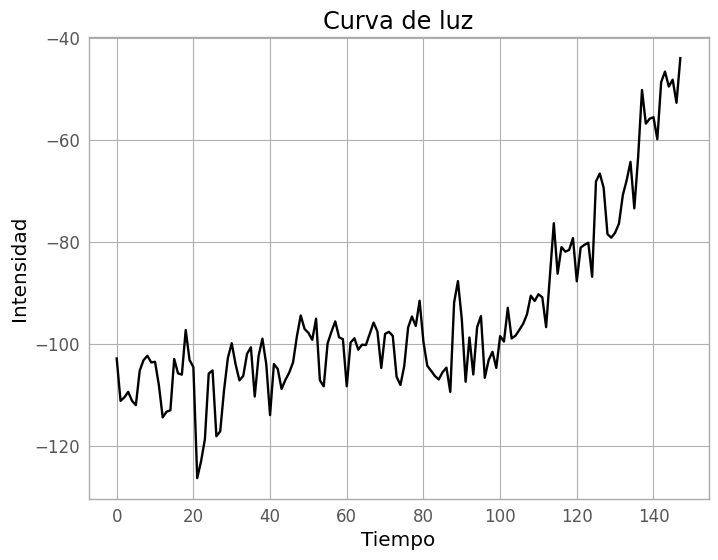

In [76]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'
# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[2].data
hdul.close()

# Obtener los tiempos de cada medición (esto es solo un ejemplo, ajusta según tus datos)
tiempos = range(image_data.shape[2])

# Visualizar la curva de luz
plt.figure()
plt.plot(tiempos, image_data[5, 5, :], '-k')  # Aquí asumimos una posición específica (0, 0), ajusta según tus datos
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.title('Curva de luz')
plt.show()


Filename: mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    217   1154R x 8C   [D, D, E, 24A, 24A, E, K, K]   
  2                1 ImageHDU       201   (148, 104, 1154)   float32   
  3                1 ImageHDU         8   (148, 104, 1154)   float32   


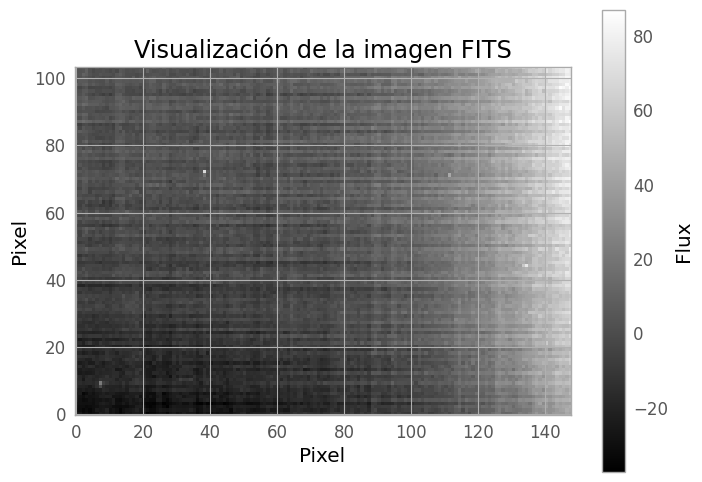

In [107]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'
fits.info(archivo_fits)
# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[2].data
hdul.close()

# Visualizar la imagen bidimensional
plt.figure()
image_data=(image_data[0]+image_data[1]+image_data[2]-image_data[3])/4
# sum_image = np.sum(image_data)



plt.imshow(image_data, cmap='gray', origin='lower')  # Utilizamos 'origin=lower' para corregir la orientación de la imagen
plt.colorbar(label='Flux')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.title('Visualización de la imagen FITS')
plt.show()

Filename: mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    217   1154R x 8C   [D, D, E, 24A, 24A, E, K, K]   
  2                1 ImageHDU       201   (148, 104, 1154)   float32   
  3                1 ImageHDU         8   (148, 104, 1154)   float32   


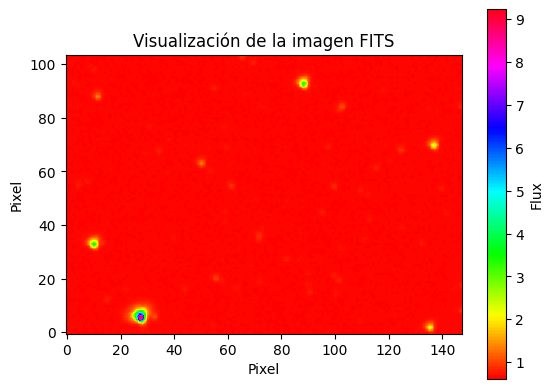

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'
fits.info(archivo_fits)
# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[3].data
hdul.close()
len(image_data)
image_datax=image_data[0]
for each in range(len(image_data)):
    image_datax = image_datax+image_data[each]
image_data=image_datax/len(image_data)

plt.figure()
plt.imshow(image_data, cmap='hsv', origin='lower')  # Utilizamos 'origin=lower' para corregir la orientación de la imagen
plt.colorbar(label='Flux')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.title('Visualización de la imagen FITS')
plt.show()


SystemExit: 0

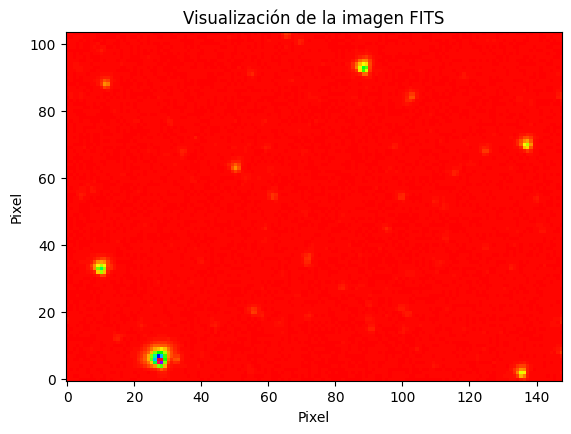

In [4]:
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget, QLabel
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'

# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[3].data
hdul.close()

# Calcular la imagen promedio
image_data_avg = image_data.mean(axis=0)

class ImageViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Visor de Imágenes FITS')

        # Crear el lienzo de la figura y mostrar la imagen FITS en él
        self.figure = plt.figure()
        self.canvas = FigureCanvas(self.figure)
        self.ax = self.figure.add_subplot(111)
        self.ax.imshow(image_data_avg, cmap='hsv', origin='lower')  # Utilizamos 'origin=lower' para corregir la orientación de la imagen
        self.ax.set_xlabel('Pixel')
        self.ax.set_ylabel('Pixel')
        self.ax.set_title('Visualización de la imagen FITS')

        # Conectar la función onclick al evento de clic en el lienzo
        self.canvas.mpl_connect('button_press_event', self.onclick)

        # Crear el QLabel para mostrar las coordenadas del clic
        self.label = QLabel(self)
        self.label.setText('Coordenadas del clic: ')

        # Crear el diseño vertical y agregar el lienzo y el QLabel al widget principal
        layout = QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.label)

        # Crear el widget principal y establecer el diseño
        main_widget = QWidget(self)
        main_widget.setLayout(layout)
        self.setCentralWidget(main_widget)

    def onclick(self, event):
        if event.xdata is not None and event.ydata is not None:
            x_coord = event.xdata
            y_coord = event.ydata
            self.label.setText(f'Coordenadas del clic: x={x_coord:.2f}, y={y_coord:.2f}')

if __name__ == '__main__':
    app = QApplication(sys.argv)
    viewer = ImageViewer()
    viewer.show()
    sys.exit(app.exec_())


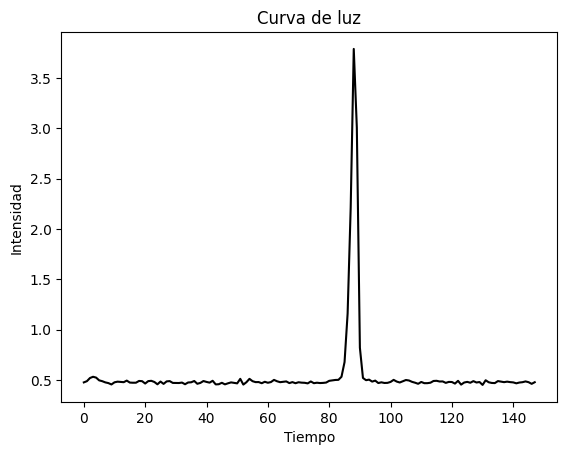

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'
# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[3].data
hdul.close()

# Obtener los tiempos de cada medición (esto es solo un ejemplo, ajusta según tus datos)
tiempos = range(image_data.shape[2])

# Visualizar la curva de luz
plt.figure()
plt.plot(tiempos, image_data[88, 93, :], '-k')  # Aquí asumimos una posición específica (0, 0), ajusta según tus datos
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.title('Curva de luz')
plt.show()


In [2]:
!pip install spectres

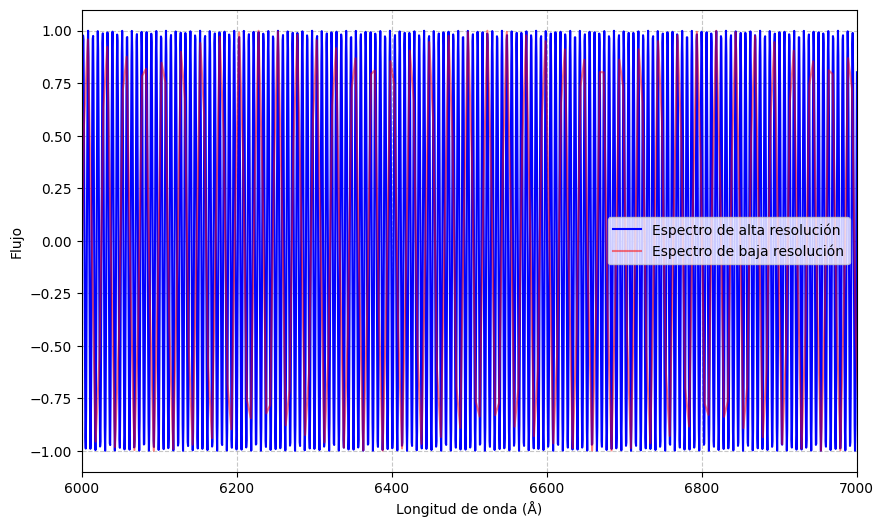

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from spectres import spectres

# Espectro de alta resolución
wavelength_high_res = np.linspace(3000, 8000, 10000)
flux_high_res = np.sin(wavelength_high_res)

# Espectro de baja resolución
wavelength_low_res = np.linspace(3000, 8000, 1000)
flux_low_res = np.sin(wavelength_low_res)

# Resolución deseada
resolution = wavelength_low_res[1] - wavelength_low_res[0]

# Convolucionar el espectro de baja resolución con la función de respuesta instrumental
conv_flux = spectres(wavelength_low_res, wavelength_high_res, flux_high_res, spec_errs=None, fill=0.0, verbose=False)

# Visualizar los espectros
plt.figure(figsize=(10, 6))
plt.plot(wavelength_high_res, flux_high_res, label='Espectro de alta resolución', color='blue')
plt.plot(wavelength_low_res, flux_low_res, label='Espectro de baja resolución', color='red', alpha=0.5)
plt.xlim(6000,7000)
# plt.plot(wavelength_low_res, conv_flux, label='Espectro convolucionado', color='green')
plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Flujo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## buscando espectros de MAST

In [1]:
from astroquery.mast import Observations
import matplotlib.pyplot as plt


In [34]:

def plot_jwst_spectrum(wavelength, flux):
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, flux, color='blue')
    plt.xlabel('Wavelength (μm)')
    plt.ylabel('Flux (erg/s/cm^2/Å)')
    plt.title('JWST Stellar Spectrum')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def download_jwst_spectrum(observation_id):
    # Buscar observaciones de espectros estelares en MAST usando el ID de observación
    observations = Observations.query_criteria(obs_id=observation_id, obs_collection='HST')
    
    if len(observations) == 0:
        print(f"No se encontraron observaciones con el ID {observation_id}")
        return None, None
    
    # Descargar el archivo del espectro de la primera observación encontrada
    data_products = Observations.get_product_list(observations)
    spectrum = Observations.download_products(data_products['productFilename'][0])
    
    # Extraer los datos del espectro
    wavelength = spectrum[1].data['WAVELENGTH']
    flux = spectrum[1].data['FLUX']
    
    return wavelength, flux

if __name__ == "__main__":
    # Observación ID del espectro estelar en MAST (reemplaza esto con un ID válido)
    observation_id = 'iei901hcq'  # Ejemplo de ID válido para el JWST

    # Descargar el espectro
    wavelength, flux = download_jwst_spectrum(observation_id)

    if wavelength is not None and flux is not None:
        # Visualizar el espectro
        plot_jwst_spectrum(wavelength, flux)


RemoteServiceError: Error converting data type varchar to bigint.

In [13]:
from astroquery.mast import Observations

def search_hst_spectrum(star_name):
    # Buscar observaciones de espectros estelares en MAST por el nombre de la estrella
    # observations = Observations.query_criteria(target_name=star_name, obs_collection='*', dataproduct_type='spectrum')
    observations = Observations.query_criteria(target_name=star_name, obs_collection='*', dataproduct_type='image')

    return observations

if __name__ == "__main__":
    # Nombre de la estrella
    star_name = '*'

    # Buscar observaciones de espectros estelares por el nombre de la estrella
    observations = search_hst_spectrum(star_name)

    # Mostrar los resultados de la búsqueda
    print(observations)


intentType obs_collection provenance_name instrument_name ... srcDen obsid objID
---------- -------------- --------------- --------------- ... ------ ----- -----
   science          GALEX             NGS           GALEX ... 5885.0     1     1
   science          GALEX             NGS           GALEX ... 5885.0     1     2
   science          GALEX             NGS           GALEX ... 5885.0     2     3
   science          GALEX             NGS           GALEX ... 5885.0     2     4
   science          GALEX             NGS           GALEX ... 5885.0     3     5
   science          GALEX             NGS           GALEX ... 5885.0     3     6
   science          GALEX             MIS           GALEX ... 5885.0     4     7
   science          GALEX             MIS           GALEX ... 5885.0     4     8
   science          GALEX             MIS           GALEX ... 5885.0     5     9
   science          GALEX             MIS           GALEX ... 5885.0     5    10
       ...            ...   

In [197]:
observations[observations["obs_collection"]=='HLA'][0]

IndexError: index 0 out of range for table with length 0

In [201]:
# a=observations[observations["obs_collection"]=='HLA'][2]
# a
a=observations[100]
a

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str5,str3,str5,str3,str3,str2,str31,str1,str19,float64,float64,str5,str23,int64,float64,float64,float64,float64,float64,str73,float64,str3,str3,int64,str43,str160,str154,str6,bool,float64,str5,str5
science,GALEX,AIS,GALEX,AIS,FUV,UV,AIS_144_1_41,--,6375982349091340288,357.500023996605,21.763365192845,image,--,2,53233.5057175926,53234.12596064815,238.0,134000000000.0,180600000000.0,--,55419.92944437,--,AIS,--,CIRCLE ICRS 357.50002400 21.76336519 0.625,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50144-AIS_144/d/01-main/0001-img/07-try/qa/AIS_144_sg41-xd-int_2color.jpg,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50144-AIS_144/d/01-main/0001-img/07-try/AIS_144_sg41-xd-mcat.fits.gz,PUBLIC,--,5885.0,19394,32226


In [202]:
product_list = Observations.get_product_list(a)
# product_list = product_list['obs_id'][0]  # Obtener el primer elemento de la columna 'obsID'
# product_list.columns=[["obs_collection","provenance_name","obsid","target_classification","target_name","s_ra","s_dec","dataproduct_type","jpegURL"]]
spectrum = Observations.download_products(product_list, download_dir='.')

In [116]:
import matplotlib.pyplot as plt
from astropy.io import *

archivo_fits = 'mastDownload\\HLA\HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D\\HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D.FITS'
fits.info(archivo_fits)
# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
# hdul.close()


Filename: mastDownload\HLA\HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D\HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D.FITS
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  Spectral Container    1 BinTableHDU    171   1R x 6C   [111D, 111D, 111D, 111D, 111D, 111D]   


In [141]:
from astropy.io.fits import getheader
fits_image_filename='mastDownload\\HLA\HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D\\HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D.FITS'
# hdr = getheader(fits_image_filename)  # get default HDU (=0), i.e. primary HDU's header
# hdr
hdr = getheader(fits_image_filename, 0)  # get primary HDU's header
hdr
# hdr = getheader(fits_image_filename, 2)  # the second extension
# hdr = getheader(fits_image_filename, 'sci')  # the first HDU with EXTNAME='SCI'
# hdr = getheader(fits_image_filename, 'sci', 2)  # HDU with EXTNAME='SCI' and EXTVER=2
# hdr = getheader(fits_image_filename, ('sci', 2))  # use a tuple to do the same
# hdr = getheader(fits_image_filename, ext=2)  # the second extension
# hdr = getheader(fits_image_filename, extname='sci')  # first HDU with EXTNAME='SCI'
# hdr = getheader(fits_image_filename, extname='sci', extver=2)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [143]:
!pip install PyAstronomy

     -------------------------------------- 745.5/745.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 87.9/87.9 kB 4.9 MB/s eta 0:00:00
  Created wheel for PyAstronomy: filename=PyAstronomy-0.19.0-py3-none-any.whl size=518897 sha256=f0b3cd9fd260f1d45371f1772525179455fd2c94b759c287246cdb3712518271
  Stored in directory: c:\users\miguel\appdata\local\pip\cache\wheels\a7\06\56\7a2d017b7546ab54f8d454e2af837840774a87d0aad4bbd8b3
Successfully built PyAstronomy


In [149]:
specdata.header

AttributeError: 'NoneType' object has no attribute 'header'

In [153]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
quantity_support()  # for getting units on the axes below  

f = fits.open('mastDownload\\HLA\HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D\\HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D.FITS')
# The spectrum is in the second HDU of this file.
specdata = np.array(f[1].data)
print(specdata)
f.close() 

from specutils import Spectrum1D
lamb = 10**specdata['loglam'] * u.AA 
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)

[([5570., 5610., 5650., 5690., 5730., 5770., 5810., 5850., 5890., 5930., 5970., 6010., 6050., 6090., 6130., 6170., 6210., 6250., 6290., 6330., 6370., 6410., 6450., 6490., 6530., 6570., 6610., 6650., 6690., 6730., 6770., 6810., 6850., 6890., 6930., 6970., 7010., 7050., 7090., 7130., 7170., 7210., 7250., 7290., 7330., 7370., 7410., 7450., 7490., 7530., 7570., 7610., 7650., 7690., 7730., 7770., 7810., 7850., 7890., 7930., 7970., 8010., 8050., 8090., 8130., 8170., 8210., 8250., 8290., 8330., 8370., 8410., 8450., 8490., 8530., 8570., 8610., 8650., 8690., 8730., 8770., 8810., 8850., 8890., 8930., 8970., 9010., 9050., 9090., 9130., 9170., 9210., 9250., 9290., 9330., 9370., 9410., 9450., 9490., 9530., 9570., 9610., 9650., 9690., 9730., 9770., 9810., 9850., 9890., 9930., 9970.], [ 0.02856187,  0.02672121,  0.02998768,  0.05452058,  0.04161129,  0.01881665,  0.02969996,  0.04393021,  0.03702223,  0.0367603 ,  0.03522165,  0.05314774,  0.06311432,  0.07276163,  0.08018983,  0.08695966,  0.0702924

ValueError: no field of name loglam

In [155]:
!pip install pyfits

  Using cached pyfits-3.5.tar.gz (1.7 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [135 lines of output]
      C:\ProgramData\Anaconda3\envs\astrophysics\lib\site-packages\setuptools\dist.py:745: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'author-email' will not be supported in future
              versions. Please use the underscore name 'author_email' instead.
      
              By 2023-Sep-26, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              ********************************************************************************
      
      !!
        opt = self.warn_dash_deprecation(opt, section)
  

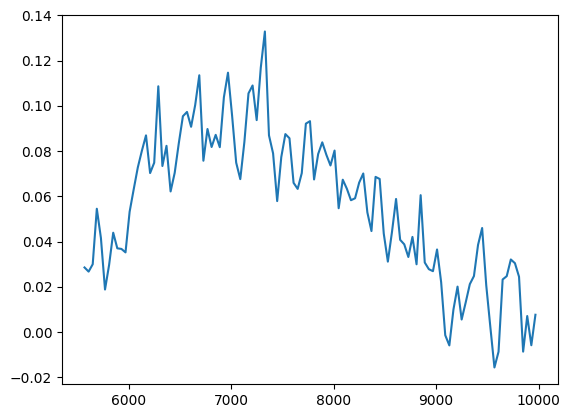

In [195]:
fits=hdul[1].data
plt.plot(fits['WAVE'][0,],fits['COUNT'][0,])

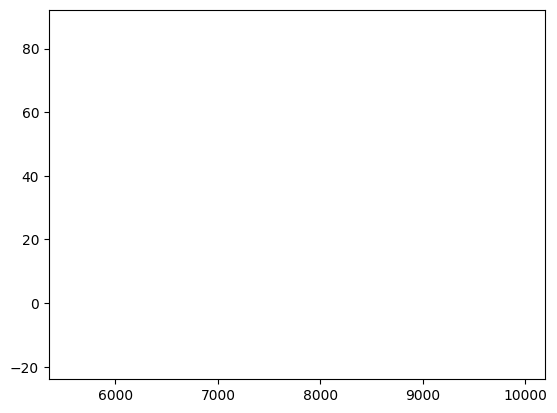

In [102]:
# HLA
wv=hdul[1].data['WAVE']
flx=hdul[1].data['FLUX']*1e+20
plt.plot(wv,flx)

In [74]:
# WUPPE
WLFLX=hdul[1].data
WV=WLFLX['WAVE']
FLUX=WLFLX['FLUX']
WV_numpy = np.array(WV, dtype=np.float64)
WV_numpy
FLUX_numpy = np.array(FLUX,dtype=np.float64)
FLUX_numpy
plt.plot(WV_numpy,FLUX_numpy)

NameError: name 'np' is not defined

In [148]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Ruta del archivo FITS
archivo_fits = 'mastDownload\\WUPPE\\jupiter_120461_2\\jupiter_120461_2_hw_vo.fits'

# Abrir el archivo FITS
hdul = fits.open(archivo_fits)

# Obtener los datos del espectro desde el HDU 0
spectral_data = hdul[0].data

# Cerrar el archivo FITS
# hdul.close()

# Asumiendo que los datos espectrales están en la columna 'FLUX'
flux = spectral_data

# Asumiendo que las longitudes de onda asociadas están en la columna 'WAVELENGTH'
# Aquí usaremos valores de ejemplo, ya que no puedo visualizar el contenido real del archivo FITS
wavelength = range(len(flux))

# Ploteo del espectro
plt.figure(figsize=(10, 6))
plt.plot(wavelength, flux, color='blue')
plt.xlabel('Índice de Longitud de Onda')
plt.ylabel('Flujo')
plt.title('Espectro desde Archivo FITS')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


array([[9.97623859e-13, 1.01361280e-12, 1.27954765e-12, 1.50281198e-12,
        1.31145572e-12, 1.05698664e-12, 1.20933602e-12, 1.33956550e-12,
        1.17653727e-12, 1.14762540e-12, 1.21211786e-12, 1.09882361e-12,
        1.13694839e-12, 1.45953236e-12, 1.65946271e-12, 1.60504422e-12,
        1.47934670e-12, 1.36296952e-12, 1.42867586e-12, 1.66444983e-12,
        1.62968011e-12, 1.24041944e-12, 1.07217815e-12, 1.32877075e-12,
        1.51731839e-12, 1.53515005e-12, 1.69086945e-12, 1.85222714e-12,
        1.85060821e-12, 1.89984335e-12, 1.92580327e-12, 1.69528573e-12,
        1.49602834e-12, 1.57182871e-12, 1.73086892e-12, 1.97937977e-12,
        2.37301455e-12, 2.58853334e-12, 2.53414412e-12, 2.49132832e-12,
        2.47825870e-12, 2.41907275e-12, 2.37206066e-12, 2.33225678e-12,
        2.31445375e-12, 2.40101970e-12, 2.45693136e-12, 2.38538312e-12,
        2.44994563e-12, 2.70087468e-12, 2.78263480e-12, 2.65907305e-12,
        2.64798947e-12, 2.77758112e-12, 2.83907598e-12, 2.825208

In [117]:
hdul.info()

Filename: mastDownload\HST\y22g0102t\y22g0102t_c5f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (4128,)   float32   
  1  y22g0102t_cvt.c5h.tab    1 TableHDU       185   1R x 25C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, A8, I12, E15.7, A4, E15.7, E15.7, E15.7]   


In [123]:
import numpy as np

# Obtener el header del HDU 0 (PRIMARY)
header = hdul[0].header

# Obtener los valores relevantes del encabezado
crval1 = header['CRVAL1']  # Valor de la longitud de onda en el píxel CRPIX1
crpix1 = header['CRPIX1']  # Índice del píxel inicial (generalmente 1)
cd1_1 = header['CD1_1']    # Incremento de la longitud de onda por píxel

# Calcular las longitudes de onda para cada píxel
wavelength = crval1 + (np.arange(header['NAXIS1']) - (crpix1 - 1)) * cd1_1

# Ver la escala completa de longitudes de onda
print("Longitudes de onda:", wavelength, "Angstroms")


Longitudes de onda: [-1.000e+00  0.000e+00  1.000e+00 ...  4.124e+03  4.125e+03  4.126e+03] Angstroms


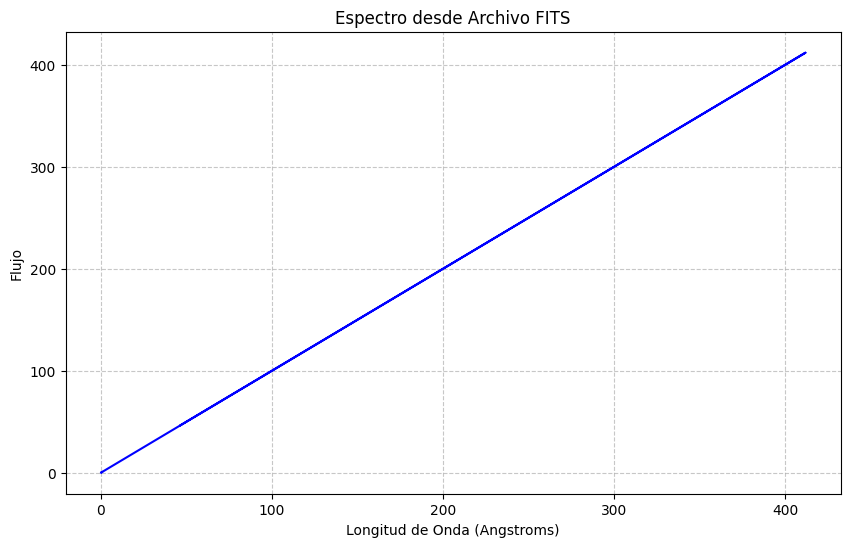

In [121]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Ruta del archivo FITS
archivo_fits = 'mastDownload\\HST\\y22g0102t\\y22g0102t_c5f.fits'

# Abrir el archivo FITS
hdul = fits.open(archivo_fits)

# Obtener los datos del espectro desde el HDU 0
spectral_data = hdul[0].data

# Asumiendo que las longitudes de onda asociadas están en la columna 'WAVELENGTH'
# En tu caso, los datos están almacenados en un arreglo 1D, por lo que puedes acceder directamente a ellos
wavelength = spectral_data

# Ploteo del espectro
plt.figure(figsize=(10, 6))
plt.plot(wavelength, spectral_data, color='blue')
plt.xlabel('Longitud de Onda (Angstroms)')
plt.ylabel('Flujo')
plt.title('Espectro desde Archivo FITS')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Cerrar el archivo FITS
hdul.close()


In [77]:
ls "C:\Users\miguel\Documents\github\GETspectrum\mastDownload\HST\y22g0102t"

 El volumen de la unidad C es OS
 El n�mero de serie del volumen es: 7A34-994B

 Directorio de C:\Users\miguel\Documents\github\GETspectrum\mastDownload\HST\y22g0102t

29/07/2023  19:18    <DIR>          .
29/07/2023  18:20    <DIR>          ..
29/07/2023  19:18            54,720 y22g0102t_c1f.fits
29/07/2023  19:18            54,720 y22g0102t_c4f.fits
29/07/2023  19:18            54,720 y22g0102t_c5f.fits
29/07/2023  18:20            54,720 y22g0102t_cqf.fits
29/07/2023  19:18            57,600 y22g0102t_d0f.fits
29/07/2023  19:18            54,720 y22g0102t_q0f.fits
29/07/2023  19:18            31,680 y22g0102t_shf.fits
29/07/2023  19:18            51,840 y22g0102t_trl.fits
29/07/2023  19:18            17,280 y22g0102t_ulf.fits
               9 archivos        432,000 bytes
               2 dirs   2,172,796,928 bytes libres


In [82]:
from astropy.io import fits

# Ruta del archivo FITS
archivo_fits = 'mastDownload\\HST\\y22g0102t\\y22g0102t_c5f.fits'

# Abrir el archivo FITS
hdul = fits.open(archivo_fits)

# Obtener el primer HDU que contiene los datos del espectro (HDU 0)
spectral_data_hdu = hdul[1]

# Obtener las cabeceras (nombres de las columnas)
column_headers = spectral_data_hdu.columns.names

# Imprimir las cabeceras
print("Cabeceras de las columnas:")
for header in column_headers:
    print(header)

# Cerrar el archivo FITS
hdul.close()


Cabeceras de las columnas:
CRVAL1
CRVAL2
CRPIX1
CRPIX2
CD1_1
CD1_2
CD2_1
CD2_2
DATAMIN
DATAMAX
MIR_REVR
ORIENTAT
FILLCNT
ERRCNT
FPKTTIME
LPKTTIME
CTYPE1
CTYPE2
APER_POS
PASS_DIR
YPOS
YTYPE
EXPOSURE
X_OFFSET
Y_OFFSET


In [126]:
!pip install specutils

  Obtaining dependency information for specutils from https://files.pythonhosted.org/packages/e0/4d/e083790675d61cfb74f7aa578bae11088b9293e925b05c09d74daf58952c/specutils-1.11.0-py3-none-any.whl.metadata
     -------------------------------------- 108.1/108.1 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 73.1/73.1 kB 4.2 MB/s eta 0:00:00
     ------------------------------------- 431.4/431.4 kB 13.2 MB/s eta 0:00:00
  Obtaining dependency information for ndcube>=2.0 from https://files.pythonhosted.org/packages/84/de/c1e814ee8d25841308f2a928ae844f117f2c45237776ab22142a51b41a2a/ndcube-2.1.3-py3-none-any.whl.metadata
     ---------------------------------------- 71.8/71.8 kB ? eta 0:00:00
     ------------------------------------- 195.6/195.6 kB 11.6 MB/s eta 0:00:00
  Using cached jsonschema-4.17.3-py3-none-any.whl (90 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: st

In [132]:
from specutils import Spectrum1D
spec1d = Spectrum1D.read("mastDownload\\HST\\y22g0102t\\y22g0102t_c5f.fits", format="SDSS-III/IV spec")  

ValueError: 'COUNTS/S' did not parse as unit: At col 0, COUNTS is not a valid unit. Did you mean count? If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html

https://learn.astropy.org/tutorials/color-excess.html

In [5]:
import pathlib

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import astropy.units as u
from astropy.table import Table
from dust_extinction.parameter_averages import CCM89, F99
from synphot import units, config
from synphot import SourceSpectrum,SpectralElement,Observation,ExtinctionModel1D
from synphot.models import BlackBodyNorm1D
from synphot.spectrum import BaseUnitlessSpectrum
from synphot.reddening import ExtinctionCurve
from astroquery.simbad import Simbad
from astroquery.mast import Observations
import astropy.visualization

In [4]:
!pip install synphot dust_extinction

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.3 MB/s eta 0:00:0000:01:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.0/447.0 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for synphot: filename=synphot-1.2.1-cp39-cp39-macosx_10_9_x86_64.whl size=902875 sha256=6e304b2fd48dd06e3d5648b352d5d7a4351cf869c9015af332cff04a912a3237
  Stored in directory: /Users/miguelandrade/Library/Caches/pip/wheels/74/c8/99/9dd115b9e15a615062c8e90d284b6f402a016bdffab6d1eb58
  Created wheel for dust_extinction: filename=dust_extinction-1.2-py3-none-any.whl size=432578 sha256=d73207db4e86e1d76b7b695228221e7ec2594efc5f66ca3015ed093002935390
  Stored in directory: /Users/miguelandrade/Library/Caches/pip/wheels/5f/8d/2a/868f68b47e618d3

In [7]:
pwd

'/Users/miguelandrade/Documents/github/GETspectrum'

In [8]:
t_lwr = Table.read('mastDownload/HLA/HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D/HAG_J154242.18-104452.2_J8HPCRVZQ_V01.SPEC1D.FITS')
t_lwr

WAVE,COUNT,CERR,FLUX,ERR,CONTAM
Angstrom,cps,cps,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),erg / (Angstrom cm2 s)
float64[111],float64[111],float64[111],float64[111],float64[111],float64[111]
5570.0 .. 9970.0,0.028561869636178017 .. 0.007658828981220722,0.016482379287481308 .. 0.021739713847637177,7.5176107603501e-19 .. 1.8470648395215886e-19,4.339154263966488e-19 .. 5.242930250278278e-19,3.9179073671450306e-20 .. 2.390493001347863e-21


https://learn.astropy.org/tutorials/color-excess.html

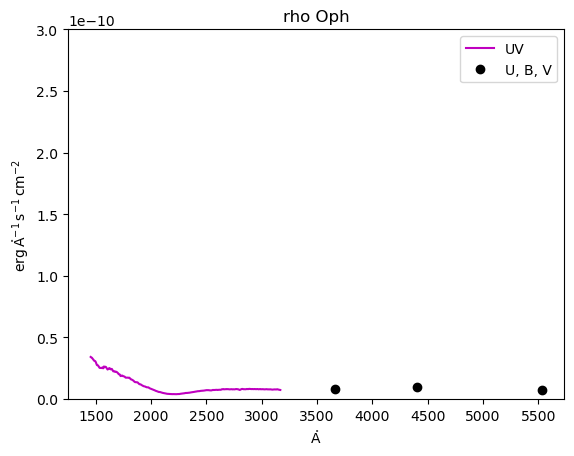

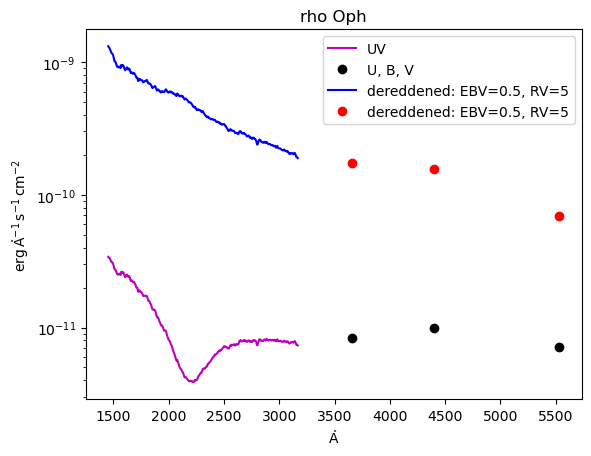

In [9]:
t_lwr = Table.read('mastDownload/WUPPE/hd147888_454310_2/hd147888_454310_2_hw_vo.fits')
t_lwr

wav_UV = t_lwr['WAVE'][0,].quantity
UVflux = t_lwr['FLUX'][0,].quantity

custom_query = Simbad()
custom_query.add_votable_fields('fluxdata(U)','fluxdata(B)','fluxdata(V)')
phot_table=custom_query.query_object('HD 147888')
Umag=phot_table['FLUX_U']
Bmag=phot_table['FLUX_B']
Vmag=phot_table['FLUX_V']

wav_U = 0.3660 * u.micron 
zeroflux_U_nu = 1.81E-23 * u.Watt/(u.m*u.m*u.Hz)
wav_B = 0.4400 * u.micron
zeroflux_B_nu = 4.26E-23 * u.Watt/(u.m*u.m*u.Hz)
wav_V = 0.5530 * u.micron
zeroflux_V_nu = 3.64E-23 * u.Watt/(u.m*u.m*u.Hz)

zeroflux_U = zeroflux_U_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, 
                              equivalencies=u.spectral_density(wav_U))
zeroflux_B = zeroflux_B_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, 
                              equivalencies=u.spectral_density(wav_B))
zeroflux_V = zeroflux_V_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, 
                              equivalencies=u.spectral_density(wav_V))

Uflux = zeroflux_U * 10.**(-0.4*Umag)
Bflux = zeroflux_B * 10.**(-0.4*Bmag)
Vflux = zeroflux_V * 10.**(-0.4*Vmag)

astropy.visualization.quantity_support()

plt.plot(wav_UV,UVflux,'m',label='UV')
plt.plot(wav_V,Vflux,'ko',label='U, B, V')
plt.plot(wav_B,Bflux,'ko')
plt.plot(wav_U,Uflux,'ko')
plt.legend(loc='best')
plt.ylim(0,3E-10)
plt.title('rho Oph')
plt.show()

Rv = 5.0  # Usually around 3, but about 5 for this star.
Ebv = 0.5
ext = F99(Rv=Rv)

plt.semilogy(wav_UV,UVflux,'m',label='UV')
plt.semilogy(wav_V,Vflux,'ko',label='U, B, V')
plt.semilogy(wav_B,Bflux,'ko')
plt.semilogy(wav_U,Uflux,'ko')

plt.semilogy(wav_UV,UVflux/ext.extinguish(wav_UV,Ebv=Ebv),'b',
             label='dereddened: EBV=0.5, RV=5')
plt.semilogy(wav_V,Vflux/ext.extinguish(wav_V,Ebv=Ebv),'ro',
             label='dereddened: EBV=0.5, RV=5')
plt.semilogy(wav_B,Bflux/ext.extinguish(wav_B,Ebv=Ebv),'ro')
plt.semilogy(wav_U,Uflux/ext.extinguish(wav_U,Ebv=Ebv),'ro')

plt.legend(loc='best')
plt.title('rho Oph')
plt.show()

In [1]:
# t_lwr = Table.read('mastDownload\\WUPPE\\hd147888_454310_2\\hd147888_454310_2_hw_vo.fits')
HSTname="mastDownload/HLA/HAG_J033209.80-274241.9_J9FAAFE2Q_V01.SPEC1D/HAG_J033209.80-274241.9_J9FAAFE2Q_V01.SPEC1D.FITS"
t_lwr = Table.read(HSTname)
wav_UV = t_lwr['WAVE'][0,].quantity
UVflux = t_lwr['FLUX'][0,].quantity
plt.semilogy(wav_UV,UVflux)

NameError: name 'Table' is not defined

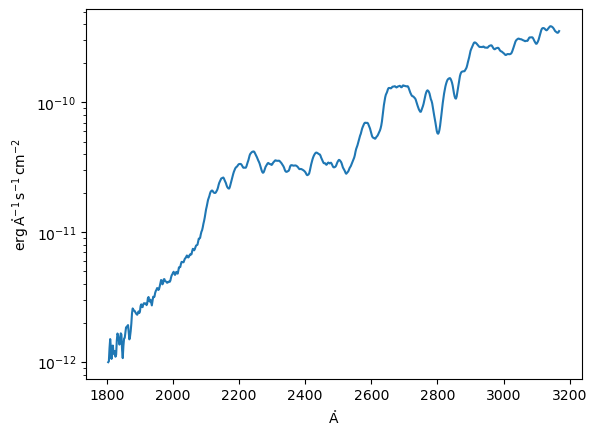

In [11]:
HSTname="mastDownload/WUPPE/jupiter_120461_2/jupiter_120461_2_hw_vo.fits"
t_lwr = Table.read(HSTname)
wav_UV = t_lwr['WAVE'][0,].quantity
UVflux = t_lwr['FLUX'][0,].quantity
plt.semilogy(wav_UV,UVflux)